In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

if os.path.isdir("/content/drive/MyDrive/EZClone/edge_profile"):
    %cd "/content/drive/MyDrive/EZClone/edge_profile/plots"

/content/drive/MyDrive/EZClone/edge_profile/plots


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

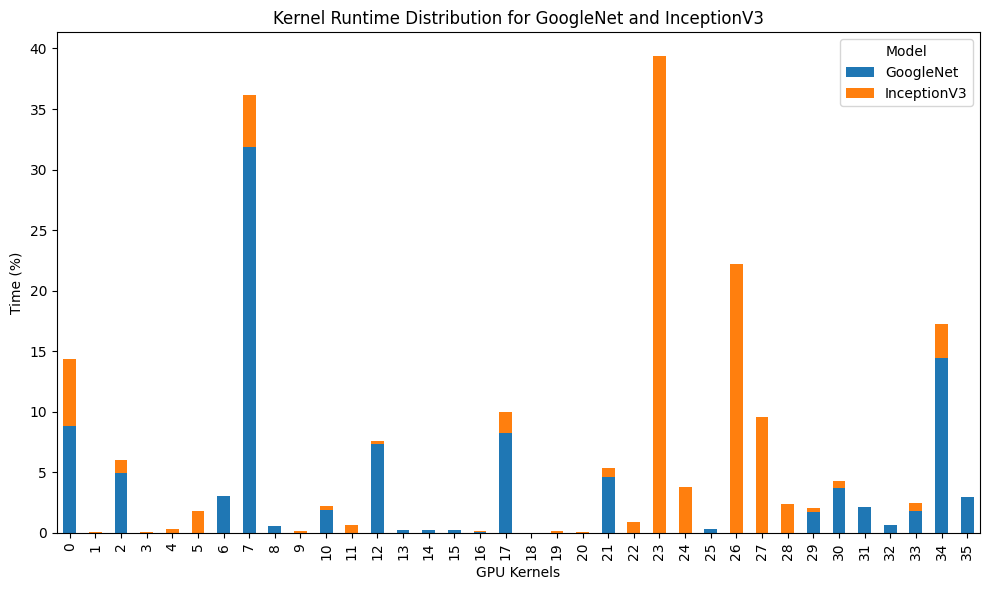

In [ ]:
# Load the CSV files into Pandas DataFrames
googlenet_df = pd.read_csv("googlenet_profile.txt")
inceptionv3_df = pd.read_csv("inceptionv3_profile.txt")

# Extract the relevant columns for plotting
googlenet_data = googlenet_df[["Time(%)", "Name"]]
inceptionv3_data = inceptionv3_df[["Time(%)", "Name"]]

# Combine the DataFrames for easier plotting
combined_data = pd.concat([googlenet_data, inceptionv3_data], keys=["GoogleNet", "InceptionV3"])
combined_data = combined_data.reset_index(level=0).rename(columns={"level_0": "Model"})

# Pivot the DataFrame to have kernels as rows and models as columns
pivot_df = combined_data.pivot(index="Name", columns="Model", values="Time(%)")

# Plot the stacked bar chart
pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kernel Runtime Distribution for GoogleNet and InceptionV3")
plt.xlabel("GPU Kernels")
plt.ylabel("Time (%)")
plt.xticks(range(pivot_df.shape[0]), range(pivot_df.shape[0]))  # Rotate x-axis labels for better readability
plt.legend(title="Model")
plt.tight_layout()
plt.show()

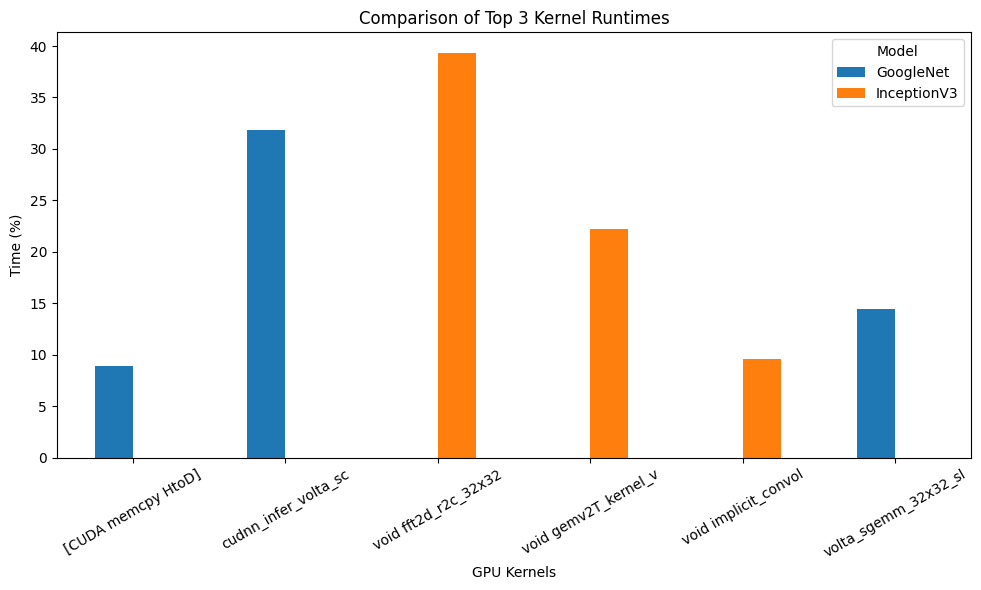

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into Pandas DataFrames
googlenet_df = pd.read_csv("googlenet_profile.txt")
inceptionv3_df = pd.read_csv("inceptionv3_profile.txt")

# Get the top 3 kernels for each model
top_3_googlenet = googlenet_df.nlargest(3, "Time(%)")[["Name", "Time(%)"]]
top_3_inceptionv3 = inceptionv3_df.nlargest(3, "Time(%)")[["Name", "Time(%)"]]

# Combine the top 3 kernels
top_3_combined = pd.concat([top_3_googlenet, top_3_inceptionv3], keys=["GoogleNet", "InceptionV3"])
top_3_combined = top_3_combined.reset_index(level=0).rename(columns={"level_0": "Model"})

# Sort by model and then by decreasing % time
top_3_combined = top_3_combined.sort_values(["Model", "Time(%)"], ascending=[True, False])

# Truncate kernel names to 10 characters
top_3_combined["Name"] = top_3_combined["Name"].str[:20]

# Pivot the DataFrame for plotting
top_3_pivot = top_3_combined.pivot(index="Name", columns="Model", values="Time(%)")

# Plot the grouped bar chart
top_3_pivot.plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of Top 3 Kernel Runtimes")
plt.xlabel("GPU Kernels")
plt.ylabel("Time (%)")
plt.xticks(rotation=30)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

In [ ]:
top_3_combined

,Model,Name,Time(%)
0,GoogleNet,cudnn_infer_volta_sc,31.868343
1,GoogleNet,volta_sgemm_32x32_sl,14.431809
2,GoogleNet,[CUDA memcpy HtoD],8.869069
0,InceptionV3,void fft2d_r2c_32x32,39.361689
1,InceptionV3,void gemv2T_kernel_v,22.242373
2,InceptionV3,void implicit_convol,9.563931


In [78]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 9.5

bar_width = 0.25  # Bar width

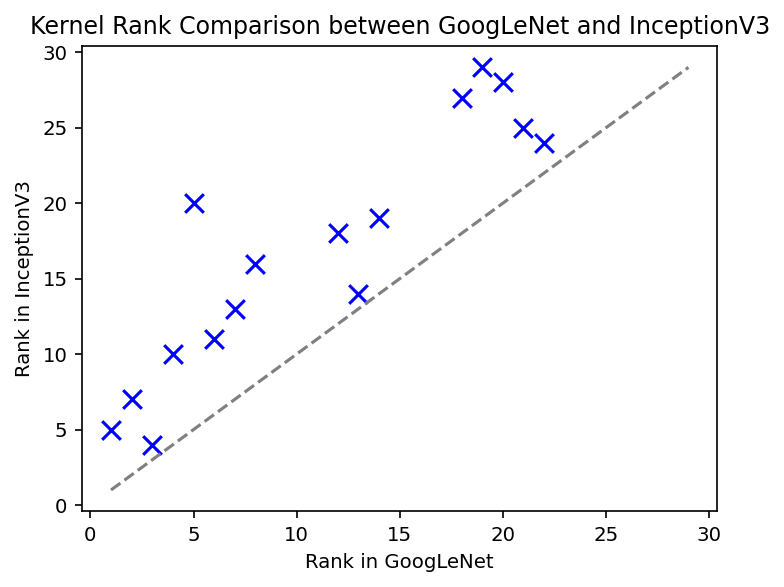

In [79]:
# Load the CSV files into Pandas DataFrames
googlenet_df = pd.read_csv("googlenet_profile.txt")
inceptionv3_df = pd.read_csv("inceptionv3_profile.txt")

# Sort by Time(%) and add a Rank column
googlenet_df = googlenet_df.sort_values("Time(%)", ascending=False).reset_index(drop=True)
googlenet_df['Rank'] = googlenet_df.index + 1

inceptionv3_df = inceptionv3_df.sort_values("Time(%)", ascending=False).reset_index(drop=True)
inceptionv3_df['Rank'] = inceptionv3_df.index + 1

# Merge the DataFrames on the 'Name' column to get ranks for each kernel
merged_df = pd.merge(googlenet_df[['Name', 'Rank']], inceptionv3_df[['Name', 'Rank']], on='Name', suffixes=('_GoogLeNet', '_InceptionV3'))

# Plot the scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(merged_df['Rank_GoogLeNet'], merged_df['Rank_InceptionV3'], marker='x', c='blue', s=80)
plt.xlabel("Rank in GoogLeNet")
plt.ylabel("Rank in InceptionV3")
plt.title("Kernel Rank Comparison between GoogLeNet and InceptionV3")

# Add diagonal line for reference
plt.plot([1, max(merged_df['Rank_GoogLeNet'].max(), merged_df['Rank_InceptionV3'].max())], [1, max(merged_df['Rank_GoogLeNet'].max(), merged_df['Rank_InceptionV3'].max())], color='gray', linestyle='--')
plt.tight_layout()
plt.savefig("inception_comparison.pdf", bbox_inches='tight', dpi=300)
plt.show()

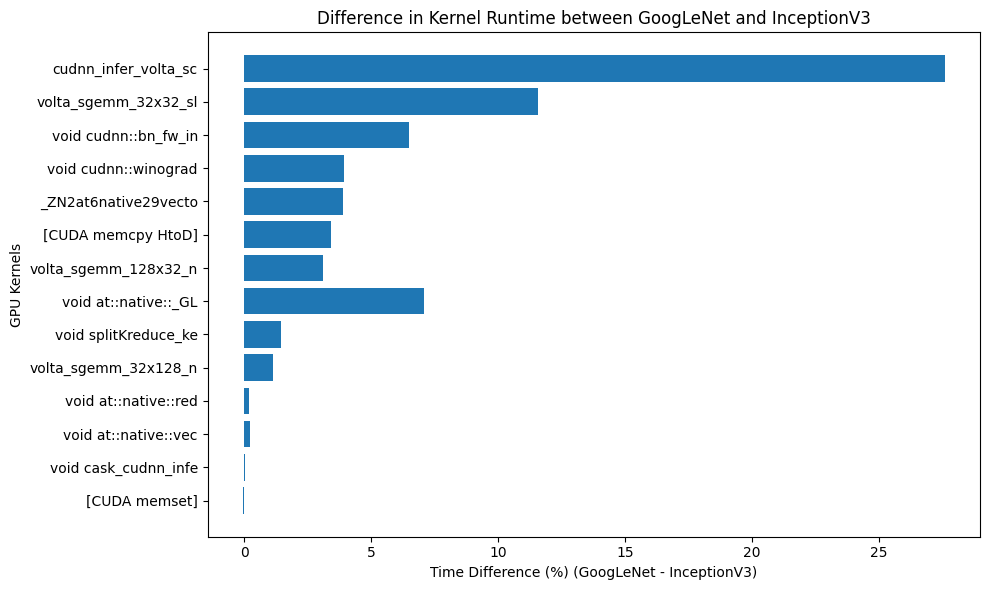

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into Pandas DataFrames
googlenet_df = pd.read_csv("googlenet_profile.txt")
inceptionv3_df = pd.read_csv("inceptionv3_profile.txt")

# Extract relevant columns and rename for merging
googlenet_data = googlenet_df[["Name", "Time(%)"]].rename(columns={"Time(%)": "Time(%)_GoogLeNet"})
inceptionv3_data = inceptionv3_df[["Name", "Time(%)"]].rename(columns={"Time(%)": "Time(%)_InceptionV3"})

# Merge the DataFrames on the 'Name' column
merged_df = pd.merge(googlenet_data, inceptionv3_data, on="Name")

# Calculate the difference in Time(%)
merged_df["Time_Diff"] = merged_df["Time(%)_GoogLeNet"] - merged_df["Time(%)_InceptionV3"]

# Sort by Time_Diff
merged_df = merged_df.sort_values("Time_Diff")

merged_df["Name"] = merged_df["Name"].str[:20]

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df["Name"], merged_df["Time_Diff"])
plt.xlabel("Time Difference (%) (GoogLeNet - InceptionV3)")
plt.ylabel("GPU Kernels")
plt.title("Difference in Kernel Runtime between GoogLeNet and InceptionV3")
plt.tight_layout()
plt.show()